# 2021 KT빅데이터 플랫폼 경진대회

# 목차
## 서론
 * 현재 한국 코로나 발생현황
## 본론
### 1. 코로나-19로 인한 수도권 배달 산업 현황
* 배달 건수 및 매출액 현황
* 업종 별 배달 건수 현황
* 생활폐기물 발생량 현황

### 2. 코로나-19로 인한 수도권 배달량과 생활폐기물 및 재활용 폐기물 발생량의 상관관계

* 상관관계 분석

## 결론

# 서론
## 현재 한국 코로나 발생 현황

In [25]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.pyplot import *

mpl.rc('font', family='Malgun Gothic')
plt.rc('font', family='NanumGothic')
%matplotlib inline

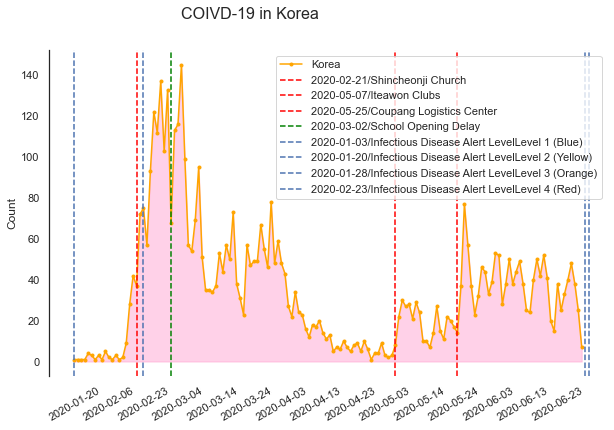

In [11]:
# 코로나 감염 현황(전국) 및 정책 데이터 불러오기
corona = pd.read_csv('./covid_19_dataset/PatientInfo.csv')
policy = pd.read_csv('./covid_19_dataset/Policy.csv')

#격상단계 추출
policy_alert_level=policy.loc[policy['gov_policy'] == 'Infectious Disease Alert Level']
pal_start_date=policy_alert_level[['start_date']]
pal_detail= policy_alert_level['gov_policy']+policy_alert_level['detail']

policy_school_delay=policy.loc[policy['gov_policy'] == 'School Opening Delay']
psd_start_date=policy_school_delay[['start_date']]
psd_detail= policy_school_delay['gov_policy']+policy_school_delay['detail']


# 전국
corona_cnt = pd.DataFrame(corona.groupby('confirmed_date')[['country']].count().to_records())

# 한국 코로나 19 확진자 추이 시각화
fig, ax = plt.subplots(figsize = (10,6))
x1 = corona_cnt.confirmed_date
y1 = corona_cnt.country
sns.set_style('white')

ax.plot(x1,y1, label = 'Korea', color = 'orange', marker = '.')
plt.fill_between(x1, y1, color = 'hotpink', alpha = .3)

#Patientinfo.csv의 infection_case를 반영
plt.axvline(x = '2020-02-21', color = 'red', linestyle = '--', label = '2020-02-21/Shincheonji Church')
plt.axvline(x = '2020-05-07', color = 'red', linestyle = '--', label = '2020-05-07/Iteawon Clubs')
plt.axvline(x = '2020-05-25', color = 'red', linestyle = '--', label = '2020-05-25/Coupang Logistics Center')

#Policy.csv를 사용
plt.axvline(x = policy_school_delay['start_date'][34], color = 'green', linestyle = '--', label = policy_school_delay['start_date'][34] + '/'+policy_school_delay['gov_policy'][34])
for i in range(len(pal_start_date)):
    plt.axvline(x = policy_alert_level['start_date'][i], color = 'b', linestyle = '--',label = policy_alert_level['start_date'][i] + '/'+ policy_alert_level['gov_policy'][i] + policy_alert_level['detail'][i])



ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 30)
plt.suptitle("COIVD-19 in Korea", size = 16, ha = 'right')
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

# 본론
## 1. 코로나-19로 인한 수도권 배달 산업 현황
### 1-1. 전국 배달 건수 및 매출액 현황

#### 1-1-1 전국 배달 건수 현황

In [8]:
dlvr_call=pd.read_csv('./KT_빅데이터플랫폼_데이터셋/dlvr_call.csv')
dlvr_call=dlvr_call[dlvr_call['DLVR_STORE_BRTC_NM'] == '서울특별시']

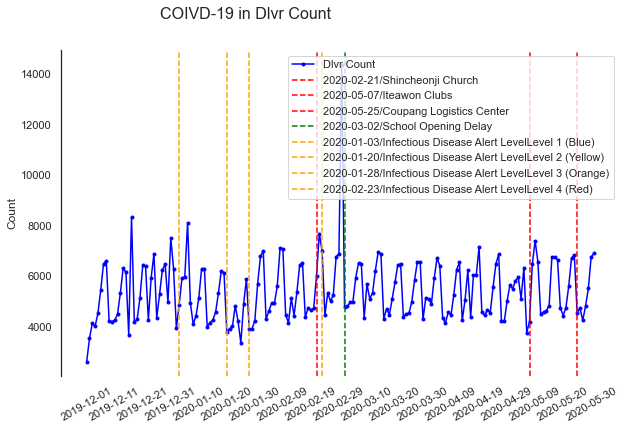

In [12]:
# 전국 배달 건수 현황
dlvr_call_cnt = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].count().to_records())
fig, ax = plt.subplots(figsize = (10,6))
x2 = dlvr_call_cnt.PROCESS_DT
y2 = dlvr_call_cnt.GOODS_AMOUNT
sns.set_style('white')
ax.plot(x2,y2, label = 'Dlvr Count', color = 'blue', marker = '.')

#Patientinfo.csv의 infection_case를 반영
plt.axvline(x = '2020-02-21', color = 'red', linestyle = '--', label = '2020-02-21/Shincheonji Church')
plt.axvline(x = '2020-05-07', color = 'red', linestyle = '--', label = '2020-05-07/Iteawon Clubs')
plt.axvline(x = '2020-05-25', color = 'red', linestyle = '--', label = '2020-05-25/Coupang Logistics Center')

#Policy.csv를 사용
plt.axvline(x = policy_school_delay['start_date'][34], color = 'green', linestyle = '--', label = policy_school_delay['start_date'][34] + '/'+policy_school_delay['gov_policy'][34])
for i in range(len(pal_start_date)):
    plt.axvline(x = policy_alert_level['start_date'][i], color = 'orange', linestyle = '--',label = policy_alert_level['start_date'][i] + '/'+ policy_alert_level['gov_policy'][i] + policy_alert_level['detail'][i])


ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 30)
plt.suptitle("COIVD-19 in Dlvr Count", size = 16, ha = 'right')
plt.ylabel('Count')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()


#### 1-1-2. 전국 배달 매출액 현황

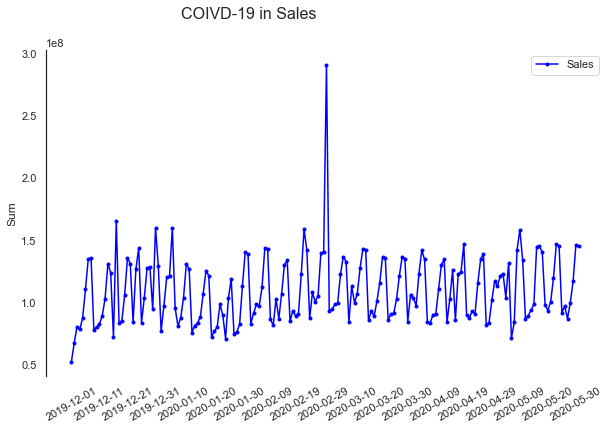

In [13]:
# 전국 배달 매출액 현황
goods_amount_sum = pd.DataFrame(dlvr_call.groupby('PROCESS_DT')[['GOODS_AMOUNT']].sum().to_records())
fig, ax = plt.subplots(figsize = (10,6))
x2 = goods_amount_sum.PROCESS_DT
y2 = goods_amount_sum.GOODS_AMOUNT
sns.set_style('white')
ax.plot(x2,y2, label = 'Sales', color = 'blue', marker = '.')

ax.set_xticks(ax.get_xticks()[::10])
plt.xticks(rotation = 30)
plt.suptitle("COIVD-19 in Sales", size = 16, ha = 'right')
plt.ylabel('Sum')
plt.legend()
sns.despine(top = True, bottom = True)
plt.show()

### 1-2. 업종 별 배달 건수 현황

In [52]:
dlvr_call['PROCESS_DT'] = pd.to_datetime(dlvr_call['PROCESS_DT'])

In [53]:
before = dlvr_call[dlvr_call['PROCESS_DT'] < pd.to_datetime('2020-02-23')]
after = dlvr_call[dlvr_call['PROCESS_DT'] > pd.to_datetime('2020-02-23')]

In [54]:
before_induty_count=pd.DataFrame(before.groupby(['DLVR_STORE_INDUTY_NM'])['GOODS_AMOUNT'].count()).reset_index()
after_induty_count=pd.DataFrame(after.groupby(['DLVR_STORE_INDUTY_NM'])['GOODS_AMOUNT'].count()).reset_index()

In [55]:
before_induty_count.columns=['업종','before']

after_induty_count.columns=['업종','after']


In [56]:
total=before_induty_count.join(after_induty_count.set_index('업종'), on= '업종')

In [57]:
total

,업종,before,after
0,도시락,2613,2622
1,돈까스/일식,10157,14843
2,배달전문업체,736,9477
3,분식,66762,68169
4,심부름,1030,1495
5,아시안/양식,14562,14415
6,야식,17179,21122
7,족발/보쌈,31876,43039
8,중식,9762,15766
9,찜탕,6011,8890


Text(0.5, 1.0, '코로나 전/후 업종별 배달 건수 비교')

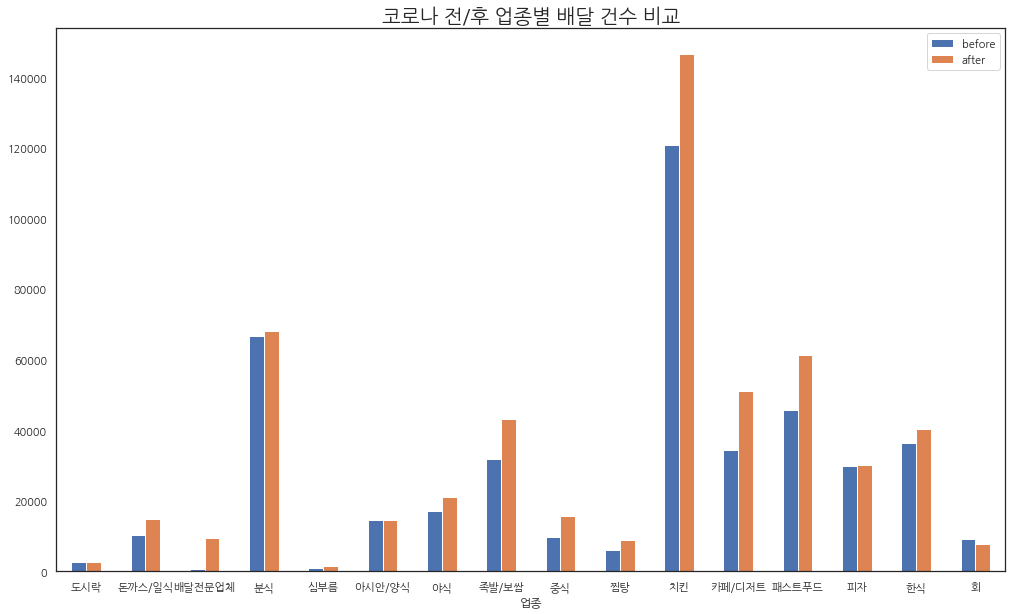

In [58]:
total.plot(kind='bar',x='업종',rot=0,figsize=(17,10))
plt.title("코로나 전/후 업종별 배달 건수 비교",fontsize=20)

### 1-3. 생활폐기물 발생량 현황

In [ ]:
recycle=pd.read_csv("./KT_빅데이터플랫폼_데이터셋/2020_guro_recycle_data.csv",encoding="euc-KR")

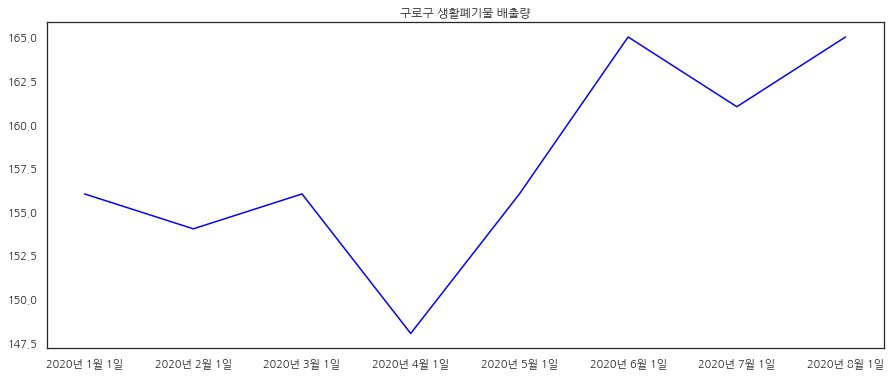

In [64]:
plt.figure(figsize=(15,6))
plt.plot(recycle['Process Dt'],recycle['생활폐기물'],color='blue')
plt.title("구로구 생활폐기물 배출량")
plt.show()

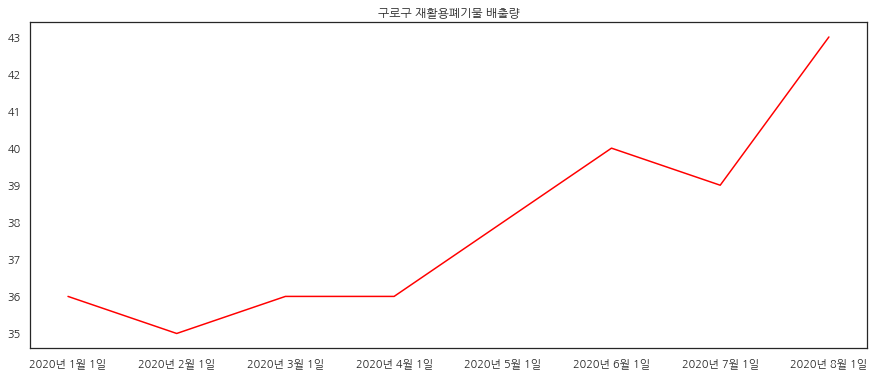

In [43]:
plt.figure(figsize=(15,6))
plt.plot(recycle['Process Dt'],recycle['재활용폐기물'],color='red')
plt.title("구로구 재활용폐기물 배출량")
plt.show()